# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Eric Chaniago
- **Email:** akkitherythm@gmail.com
- **ID Dicoding:** m_ericchaniago_cddo

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah penyewaan sepeda antara 2011 dan 2012?
- Bagaimana distribusi jumlah penyewaan sepeda pada berbagai kondisi cuaca?
- Apakah ada korelasi antara hari libur dan jumlah penyewaan sepeda?
- Seberapa besar perbedaan antara jumlah penyewaan sepeda oleh pengguna terdaftar dan tidak terdaftar dalam setahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [200]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [201]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [202]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


**Insight:**
- day_df adalah DataFrame yang berisi data harian penyewaan sepeda
- hour_df adalah DataFrame yang berisi data penyewaan sepeda per jam

### Assessing Data

#### day_df

In [203]:
# Cek tipe data masing masing variabel di kedua dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [204]:
# Cek Missing Value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [205]:
# Cek duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [206]:
# Cek parammeter statistik 
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- variabel dteday pada day_df bertipe object, bukan datetime
- tidak ada missing value pada day_df
- tidak ada duplikasi data di day_df
- sumary stats day_df terlihat aman

#### hour_df

In [207]:
# Cek tipe data masing masing variabel di kedua dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [208]:
# Cek Missing Value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [209]:
# Cek duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [210]:
# Cek summary stats
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


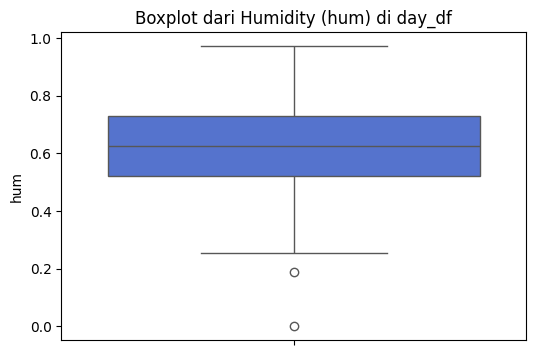

In [211]:
# Membuat boxplot untuk kolom 'hum' di day_df
plt.figure(figsize=(6,4))
sns.boxplot(y=day_df['hum'], color='royalblue')

# Menambahkan judul
plt.title("Boxplot dari Humidity (hum) di day_df")

# Menampilkan plot
plt.show()

**Insight:**
- variabel dteday pada hour_df bertipe object, bukan datetime
- tidak ada missing value pada hour_df
- tidak ada duplikasi data di day_df
- Terdapat data outlier di day_df

### Cleaning Data

In [231]:
# Menghapus hour_df
del hour_df

NameError: name 'hour_df' is not defined

In [ ]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:

# Hitung Q1, Q3, dan IQR
Q1 = day_df['hum'].quantile(0.25)
Q3 = day_df['hum'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hitung median untuk imputasi
median_hum = day_df['hum'].median()

# Masking: Ganti outlier dengan median
day_df['hum'] = day_df['hum'].mask((day_df['hum'] < lower_bound) | (day_df['hum'] > upper_bound), median_hum)

# Cek apakah outlier masih ada
print(day_df['hum'].describe())


count    731.000000
mean       0.629352
std        0.139566
min        0.254167
25%        0.522291
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64


In [ ]:
# Ubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Ekstrak informasi terkait tanggal
day_df['weekday'] = day_df['dteday'].dt.day_name()  # Ambil nama hari dalam seminggu
day_df['yr'] = day_df['dteday'].dt.year  # Ambil tahun dari tanggal

# Mapping nilai numerik ke kategori agar lebih mudah dipahami
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

month_mapping = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

day_df['season'] = day_df['season'].map(season_mapping)
day_df['mnth'] = day_df['mnth'].map(month_mapping)  # Ubah angka bulan menjadi nama bulan

# Tampilkan beberapa baris pertama
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Januari,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Januari,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Januari,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Januari,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Januari,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Menghapus hour.csv tidak akan berdampak pada kemampuan menjawab pertanyaan bisnis. Gunakan hanya day.csv, karena sudah cukup untuk analisis pada tingkat bulanan dan harian.
- Imputasi outlier pada kolom hum di day_df menggunakan masking dengan pandas dan menggantinya dengan median
- Mengubah 'dteday' menjadi tipe datetime
- Mengubah isi pada variabel weekday dan year menjadi nama hari sesuai dan tahun berdasarkan tanggal
- Mengubah nilai pada pada seaseon dan mnth menjadi string

## Exploratory Data Analysis (EDA)

### Explorasi Pengelompokan Berdasarkan Waktu

In [232]:
# Pastikan kolom mnth dalam format kategori berurutan
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], ordered=True)


# Statistik banyaknya penyewa sepeda berdasarkan bulan
day_df.groupby(by='mnth').agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'cnt': ['sum', 'mean', 'max', 'min']
})

C:\Users\akkit\AppData\Local\Temp\ipykernel_5472\4094341795.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


casual registered     cnt                         
             sum        sum     sum         mean   max   min
mnth                                                        
Januari    12042     122891  134933  2176.338710  4521   431
Februari   14963     136389  151352  2655.298246  5062  1005
Maret      44444     184476  228920  3692.258065  8362   605
April      60802     208292  269094  4484.900000  7460   795
Mei        75285     256401  331686  5349.774194  8294  2633
Juni       73906     272436  346342  5772.366667  8120  3767
Juli       78157     266791  344948  5563.677419  8173  3285
Agustus    72039     279155  351194  5664.419355  7865  1115
September  70323     275668  345991  5766.516667  8714  1842
Oktober    59760     262592  322352  5199.225806  8156    22
November   36603     218228  254831  4247.183333  6852  1495
Desember   21693     189343  211036  3403.806452  6606   441

In [233]:
# Statistik banyaknya penyewa sepeda berdasarkan hari kerja vs akhir pekan
day_df['is_weekend'] = day_df['weekday'].isin(['Saturday', 'Sunday'])
day_df.groupby(by='is_weekend').agg({
    'casual': ['sum'],
    'registered': ['sum'],
    'cnt': ['sum', 'mean']
})


casual registered      cnt             
               sum        sum      sum         mean
is_weekend                                         
False       325644    2045201  2370845  4550.566219
True        294373     627461   921834  4389.685714

**Insight:**
- Berdasarkan tabel, jumlah penyewa sepeda cenderung lebih tinggi pada bulan-bulan pertengahan tahun seperti Juli, Agustus, dan September. Sementara itu, jumlah penyewa paling rendah terjadi pada bulan Januari dan Februari.
- Tabel menunjukkan rata-rata jumlah penyewaan sepeda per hari pada hari kerja dan akhir pekan. Rata-rata penyewaan lebih tinggi pada hari kerja dengan 4.551 penyewaan per hari dibandingkan akhir pekan yang hanya mencapai 4.390 penyewaan per hari.

### Explorasi Pengelompokan Berdasarkan Faktor Eksternal

In [234]:
# Statistik banyaknya penyewa sepeda berdasarkan cuaca
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

In [235]:
# Statistik banyaknya penyewa sepeda berdasarkan musim
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [236]:
# Statistik banyaknya penyewa sepeda berdasarkan hari libur
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [237]:
# Statistik banyaknya penyewa sepeda berdasarkan hari kerja
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

**Insight:**
- Tabel menunjukkan statistik jumlah penyewaan sepeda berdasarkan kondisi cuaca (weathersit). Penyewaan tertinggi terjadi saat cuaca cerah atau berawan sebagian (kategori 1) dengan rata-rata 4.876 penyewaan per hari, sedangkan penyewaan terendah terjadi saat hujan ringan, salju ringan, atau badai petir dengan awan tersebar (kategori 3) dengan rata-rata hanya 1.803 penyewaan per hari.
- Tabel menunjukkan rata-rata jumlah penyewaan sepeda per hari berdasarkan musim. Penyewaan tertinggi terjadi pada musim gugur dengan rata-rata 5.644 sepeda per hari, sedangkan penyewaan terendah terjadi pada musim semi dengan rata-rata 2.604 sepeda per hari.
- Tabel menunjukkan rata-rata jumlah penyewaan sepeda per hari berdasarkan status hari libur. Pada hari biasa, rata-rata penyewaan mencapai 4.527 sepeda per hari, sedangkan pada hari libur, rata-rata penyewaan lebih rendah, yaitu 3.735 sepeda per hari.
- Tabel menunjukkan rata-rata jumlah penyewaan sepeda per hari berdasarkan hari kerja dan non-hari kerja. Pada hari kerja, rata-rata penyewaan mencapai 4.584 sepeda per hari, sedangkan pada hari non-kerja, rata-rata penyewaan sedikit lebih rendah, yaitu 4.330 sepeda per hari.

### Explorasi Pengelompokan Berdasarkan Faktor Lingkungan

In [238]:
# statistik suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed)c berdasarkan musim
day_df.groupby(by='season').agg({
    'temp': ['mean', 'max', 'min'],
    'hum': ['mean', 'max', 'min'],
    'windspeed': ['mean', 'max', 'min']
})


temp                           hum                     windspeed  \
            mean       max       min      mean       max       min      mean   
season                                                                         
Fall    0.706309  0.861667  0.469167  0.633482  0.939565  0.360000  0.172095   
Spring  0.297748  0.572500  0.059130  0.588789  0.948261  0.311250  0.214537   
Summer  0.544405  0.808333  0.253043  0.626948  0.922500  0.254167  0.203507   
Winter  0.422906  0.657500  0.220833  0.668719  0.972500  0.333478  0.171995   

                            
             max       min  
season                      
Fall    0.375617  0.064071  
Spring  0.507463  0.045408  
Summer  0.388067  0.065929  
Winter  0.422275  0.022392

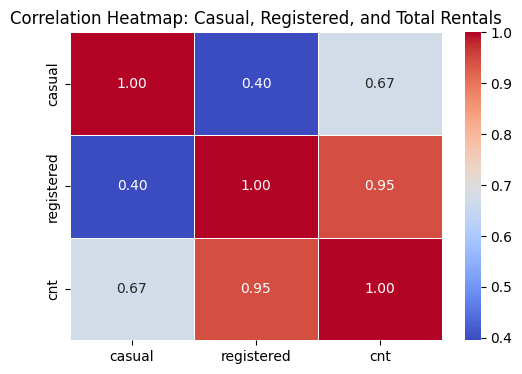

In [239]:
#  Hubungan antara penyewa pemyewa kasual, penyewa terdaftar, dan banyaknya penyewa

# Hitung korelasi
corr_matrix = day_df[['casual', 'registered', 'cnt']].corr()

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Tambahkan judul
plt.title('Correlation Heatmap: Casual, Registered, and Total Rentals')

# Tampilkan plot
plt.show()

**Insight:**
- Tabel pertama menunjukkan statistik rata-rata, nilai maksimum, dan minimum dari tiga variabel lingkungan—suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed)—berdasarkan musim dalam konteks sistem penyewaan sepeda. Data ini memberikan gambaran bagaimana kondisi cuaca bervariasi di setiap musim, yang kemungkinan berpengaruh terhadap jumlah penyewaan sepeda.
- Penyewa terdaftar (registered) merupakan kontributor utama dalam total penyewaan sepeda, dengan korelasi yang sangat kuat (0.95), menunjukkan bahwa peningkatan jumlah penyewa terdaftar berdampak signifikan terhadap total penyewaan. Sementara itu, penyewa kasual (casual) juga berkontribusi, tetapi tidak sekuat penyewa terdaftar, dengan korelasi sebesar 0.67 terhadap total penyewaan. Selain itu, pola penggunaan sepeda antara penyewa kasual dan terdaftar tampak cukup berbeda, sebagaimana ditunjukkan oleh korelasi yang relatif rendah (0.40) antara keduanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan jumlah penyewaan sepeda antara 2011 dan 2012?

In [246]:
# Kelompokkan jumlah penyewaan sepeda berdasarkan bulan dan tahun
monthly_counts = day_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()


C:\Users\akkit\AppData\Local\Temp\ipykernel_5472\4226803635.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth", "yr"]).agg({


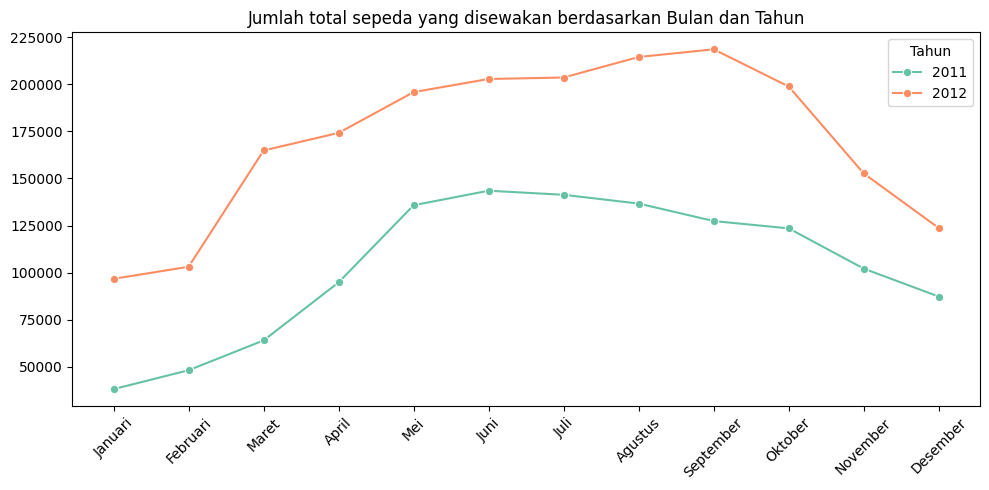

In [263]:
# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    marker="o",
    palette="Set2"
)

# Menambahkan judul dan label
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)  # Memiringkan label bulan agar lebih mudah dibaca
plt.legend(title="Tahun", loc="upper right")

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight:**
- Jumlah penyewaan sepeda pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan tahun 2011. Tren kenaikan terlihat signifikan mulai Maret, dengan puncaknya pada Agustus–September di kedua tahun, tetapi angka penyewaan pada 2012 selalu lebih tinggi dibandingkan 2011 di setiap bulan. Perbedaan ini menunjukkan adanya peningkatan minat atau faktor pendukung seperti promosi, kondisi cuaca, atau kebijakan terkait transportasi. Penurunan setelah September terjadi di kedua tahun, tetapi angka 2012 tetap lebih tinggi, mengindikasikan pertumbuhan pengguna yang lebih stabil dibandingkan tahun sebelumnya.

### Pertanyaan 2: Bagaimana distribusi jumlah penyewaan sepeda pada berbagai kondisi cuaca?

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'is_weekend', 'weather_desc'],
      dtype='object')


C:\Users\akkit\AppData\Local\Temp\ipykernel_5472\3980249012.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_df, x='weather_desc', y='cnt', palette=custom_palette)
C:\Users\akkit\AppData\Local\Temp\ipykernel_5472\3980249012.py:21: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.barplot(data=day_df, x='weather_desc', y='cnt', palette=custom_palette)


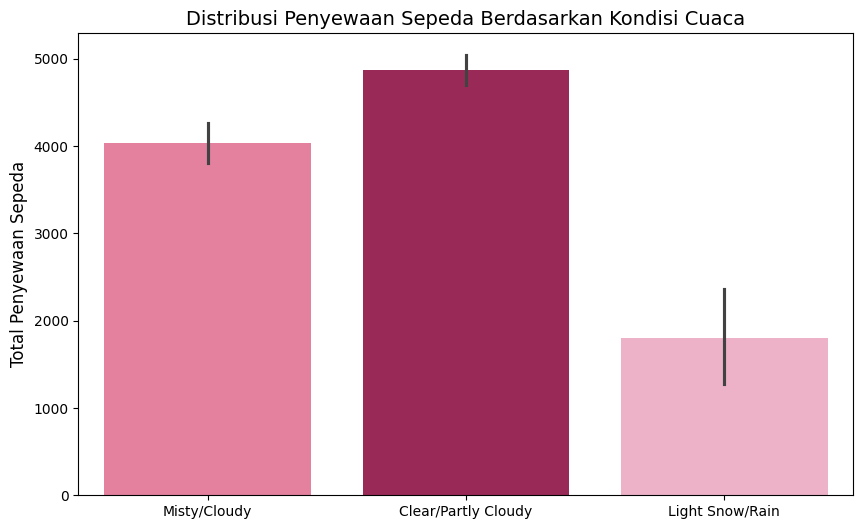

In [275]:

# Memastikan kolom yang digunakan ada dalam dataset
print(day_df.columns)  # Debugging: melihat nama kolom dalam dataset

# Mapping kategori cuaca
weather_mapping = {
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}

day_df['weather_desc'] = day_df['weathersit'].map(weather_mapping)

# Mengatur ukuran figure
plt.figure(figsize=(10, 6))

# Palet warna Set2 dengan warna paling cerah untuk kategori pertama
custom_palette = ["#F37199", "#AC1754", "#F7A8C4", "#E53888"]

# Membuat barplot jumlah penyewaan sepeda berdasarkan kondisi cuaca
ax = sns.barplot(data=day_df, x='weather_desc', y='cnt', palette=custom_palette)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xlabel(None)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)


# Menampilkan plot
plt.show()

**Insight:**
- Distribusi penyewaan sepeda menunjukkan tren menurun seiring memburuknya cuaca. Penyewaan tertinggi terjadi saat cuaca cerah/berawan (~5.000), cukup tinggi saat berkabut/berawan (~4.000), dan terendah saat hujan/salju ringan (~1.800). Cuaca yang baik meningkatkan minat penyewaan, sedangkan hujan atau salju menguranginya.

### Pertanyaan 3: Bagaimana distribusi jumlah penyewaan sepeda pada berbagai musim?

C:\Users\akkit\AppData\Local\Temp\ipykernel_5472\3539703574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='season', y='cnt', palette=custom_palette)


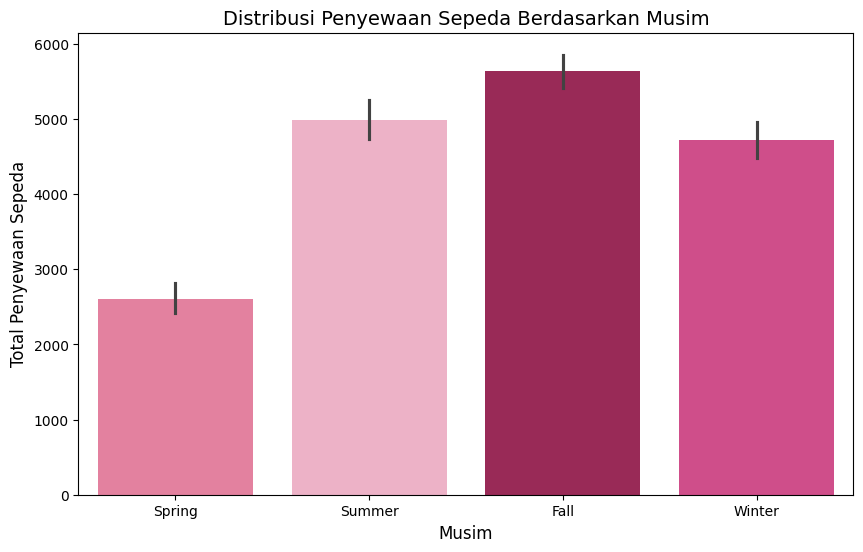

In [ ]:
# Membuat visualisasi jumlah penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
custom_palette = ["#F37199", "#AC1754", "#F7A8C4", "#E53888"]
sns.barplot(data=day_df, x='season', y='cnt', palette=custom_palette)


# Menambahkan judul dan label sumbu
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)

# Menampilkan plot
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda menunjukkan variasi berdasarkan musim. Penyewaan tertinggi terjadi pada musim gugur (fall), diikuti oleh musim panas (summer) dan musim dingin (winter). Sementara itu, musim semi (spring) mencatat jumlah penyewaan terendah. Hal ini menunjukkan bahwa kondisi cuaca yang lebih hangat dan stabil cenderung meningkatkan penggunaan sepeda, sementara musim semi yang sering hujan dapat mengurangi jumlah penyewa.

## Conclusion

- Conclution pertanyaan 1: Jumlah penyewaan sepeda pada tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011 di setiap bulan. Peningkatan signifikan terlihat terutama pada bulan Maret hingga September, dengan puncaknya di bulan September. Hal ini menunjukkan tren pertumbuhan penggunaan sepeda dari tahun ke tahun, kemungkinan dipengaruhi oleh faktor cuaca atau meningkatnya minat masyarakat dalam bersepeda.

- Conclution pertanyaan 2: Penyewaan sepeda tertinggi terjadi pada cuaca cerah atau berawan sebagian, diikuti oleh cuaca berkabut atau mendung. Penyewaan sepeda menurun secara signifikan saat terjadi hujan ringan atau salju. Hal ini menunjukkan bahwa kondisi cuaca yang lebih buruk cenderung mengurangi minat masyarakat dalam menyewa sepeda.

- Penyewaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan musim dingin, sementara musim semi memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa musim gugur dan musim panas lebih kondusif untuk aktivitas bersepeda. Musim semi yang cenderung lebih basah atau dingin mungkin menjadi faktor yang mengurangi minat penyewaan sepeda.